In [2]:
import sys
import os

cur_dir = os.path.dirname(os.path.abspath(''))
sys.path.append(cur_dir)

from tools.utils import reload_module
from datasets.fabric import make_sigmod_ds, DatasetName
from tools.utils import set_seed
import numpy as np
import tensorflow_model_optimization as tfmot
import matplotlib.pyplot as plt

set_seed(1234)

2023-08-18 12:57:52.158200: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-18 12:57:52.327326: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-18 12:57:52.970588: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
radioml2016b_path = cur_dir + "/data/radioml_2016/RML2016.10b.dat"
radioml2016a_path = cur_dir + "/data/radioml_2016/RML2016.10a_dict.pkl"
dataset_path = os.path.abspath(radioml2016b_path)
rml16b = make_sigmod_ds(DatasetName.RADIOML_2016)
rml16b.load(dataset_path, normalize=False)
# splitted_radioml_ds = rml16b.split_train_val_test(0.8, 0.1)
# print(f"Modulations: {rml16b.get_modulations()}")

{'8PSK': 0, 'AM-DSB': 1, 'BPSK': 2, 'CPFSK': 3, 'GFSK': 4, 'PAM4': 5, 'QAM16': 6, 'QAM64': 7, 'QPSK': 8, 'WBFM': 9}


In [7]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

/tmp/ipykernel_234384/3973830811.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, n)
/tmp/ipykernel_234384/201625225.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cl_data[:, 0], cl_data[:, 1], c=colors(cl))


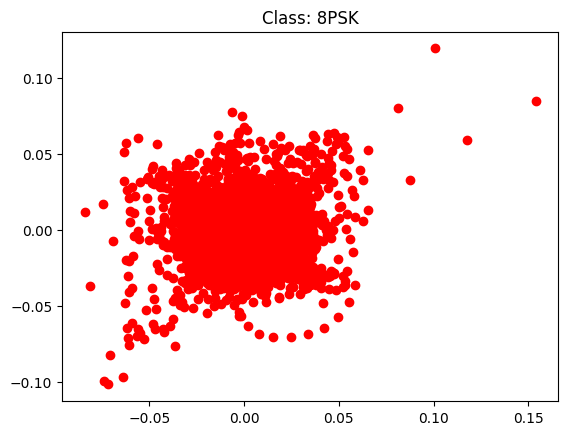

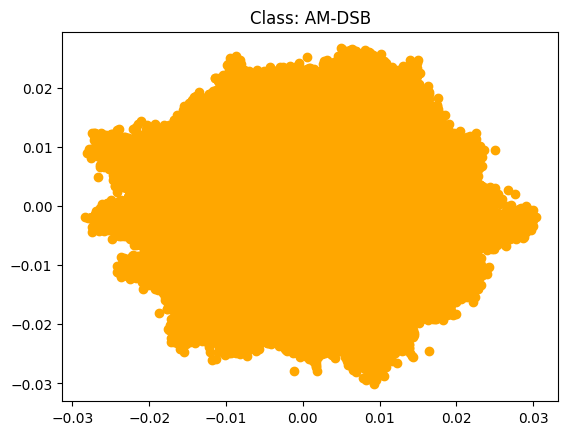

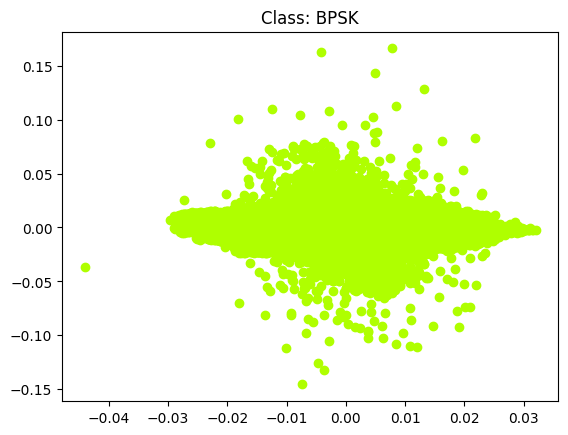

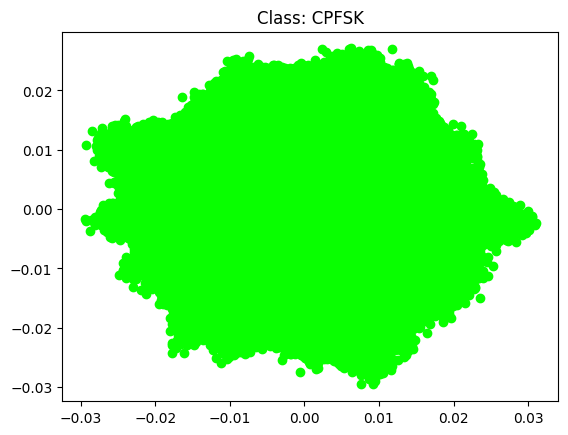

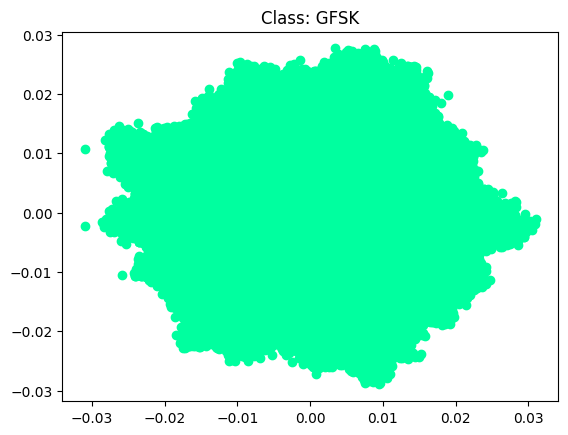

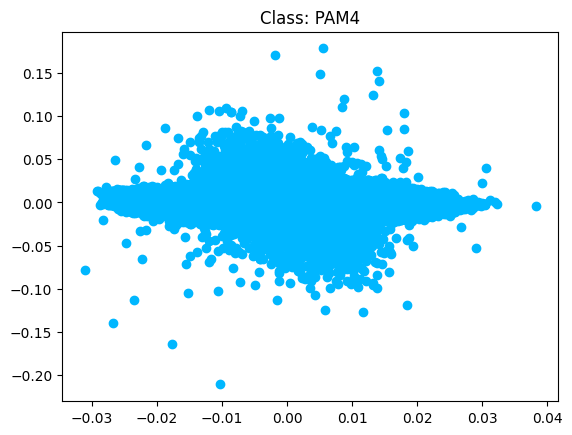

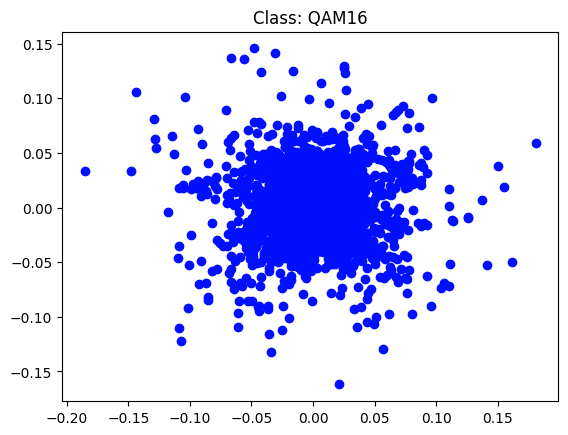

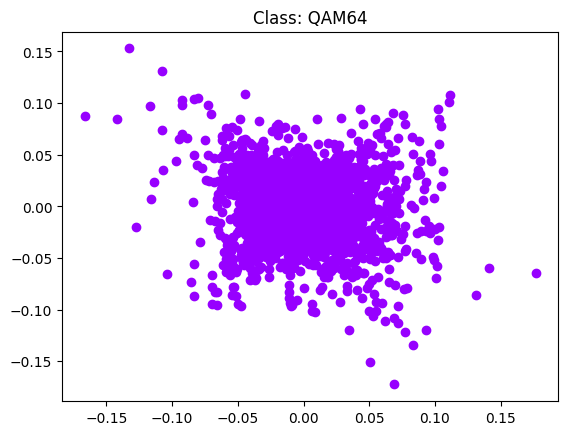

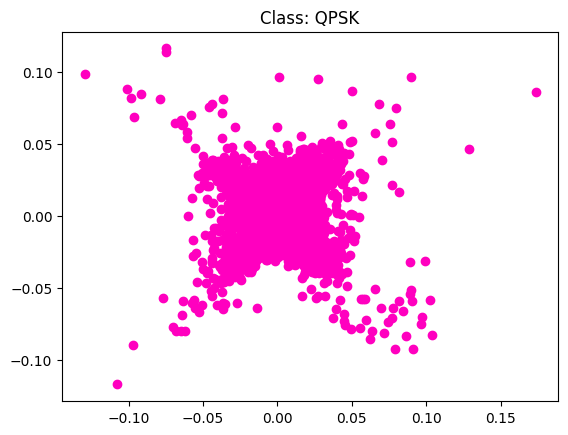

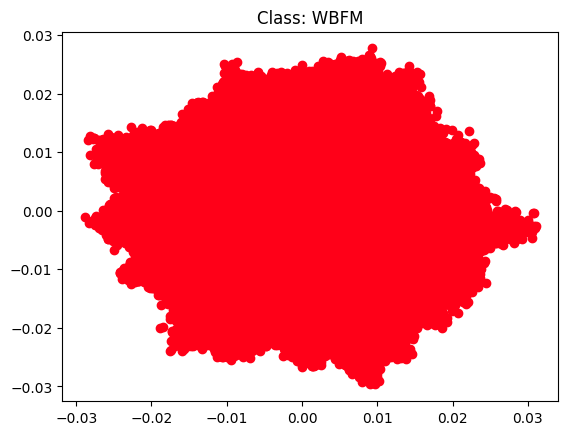

In [13]:
n_mods = len(rml16b.get_modulations())
colors = get_cmap(n_mods)
for cl in range(n_mods):
    cl_idx = np.where(rml16b.get_labels() == cl)
    cl_data = rml16b.get_data()[cl_idx]
    cl_data = cl_data.reshape((-1, 2))
    plt.scatter(cl_data[:, 0], cl_data[:, 1], c=colors(cl))
    plt.title(f"Class: {rml16b.get_modulations()[cl]}")
    plt.show()
    

In [16]:
del cl_data
rml16b.unload()
del rml16b

AttributeError: 'RadioML2016' object has no attribute '_data'